# <span style="color:blue"> Esercitazione 06 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1 
(code Monte_Carlo_ISING_1D.cpp)


### Scopo dell'esercizio

Lo scopo dell'esercizio è quello di completare la scrittura del codice fornito su Ariel e, al termine di ciò, simulare un sistema di Ising unidimensionale in un range di temperature $T \in [0.5,2]$, confrontando i risultati ottenuti con campionamento alla Metropolis e alla Gibbs con i valori analitici della soluzione esatta.

### Descrizione del codice

Vengono sintetizzati in serie gli interventi operati sul codice: <p>
    
**Ripartenza**: Nella funzione *Input()* il codice originario inizializzava il sistema costruendo una configurazione casuale di spin. Ciò corrisponde fisicamente al caso di $T=\infty$. Si è modificata la funzione inserendo una variabile booleana *iconf* da leggere sul file *input.dat* che permette la ripartenza, in modo esattamente analogo a quanto svolto nell'esercitazione 04. Se *iconf=1* il sistema legge la configurazione iniziale dal file *config.0*, in caso contrario effettua l'inizializzazione scegliendo gli spin a caso. Questa procedura permette di separare la fase di equilibrazione dalla simulazione vera e propria. <p>
    
**Metropolis & Gibbs:** Nella funzione *Move()* si sono implementati i due algoritmi di campionamento di Metropolis e Gibbs. Anche qui è presente una variabile booleana *imetro* da leggere in input che stabilisce quale dei due metodi utilizzare. <p>
Il *Metropolis* (*imetro=1*) consiste nello scegliere un sito reticolare a caso e nel proporre uno spin flip, si calcolano le energie delle configurazioni nuova e vecchia e la mossa viene accettata con probabilità  $p= min[1, \exp(-\beta \Delta E)]$. <p>
Per il *Gibbs* (*imetro=0*), invece, si individua uno spin $k$ a caso e si campiona la distribuzione condizionata $p(s_k |\{s_j: j\neq k\})$, accettando sempre la configurazione campionata. Nella pratica, visto che si ha a che fare con una distribuzione discreta a due valori, si è calcolato $p(s_k=-1 |\{s_j\})$, dopo di che si è generato un numero casuale $r$. Se $r\leq p$ si è imposto $s_k=-1$, altrimenti $s_k=1$. In tutte le casistiche il valore dello spin viene modificato, comportando accettazione 1. <p>
    
**Calcolo $C_V$, $\chi$ , $M$:** Il codice iniziale predisponeva il calcolo del valor medio dell'energia. Si è inserita la facoltà di calcolare le altre grandezze richieste. <p>
Nella funzione *Measure* si è calcolata la magnetizzazione istantanea come somma del valore di tutti gli spin del reticolo. Gli array *walker* dei valori istantanei hanno registrato i valori di $E$ e $M$, ma anche di $E^2$ e $M^2$, in modo da poter calcolare facilmente nella funzione *Averages* i valori medi richiesti. Si è, inoltre, aggiunta la scrittura su file dei valori istantanei di $E$ ed $M$, necessari nella fase di equilibrazione per stabilire quando il sistema si trovi all'equilibrio.<p>
In *Averages*, invece, dati i valori dei walker, sommati step per step negli accumulatori, si sono calcolati i valori medi delle grandezze richieste con la solita tecnica della Blocking Average.

### Analisi dati

L'intervallo di temperature $[0.5,2]$ è stato diviso in 5 parti uguali e sono stati scelti sei valori su cui effettuare la simulazione, pari a $T=0.5,\ 0.8,\ 1.1, \ 1.4,\ 1.7,\ 2$. <p>
Si è partiti dalla temperatura più alta, rilanciando il programma finchè i valori istantanei di E ed M non iniziassero a fluttuare attorno a un valore pressocchè costante. Ciascun run di equilibrazione è durato 200000 step Monte Carlo. Nel momento in cui il sistema si è stabilizzato l'equilibrio è stato raggiunto e si è rilanciato il programma per la simulazione vera e propria. Il numero di blocchi è stato empiricamente scelto pari a $N_{blk}=50$, mentre la lunghezza del blocco è stata scelta in modo analogo all'esercitazione 04, vale a dire osservando dopo quanti passi le configurazioni istantanee si scorrelavano significativamente tra di loro. <p>
A questo punto, dopo aver simulato il sistema sia con l'algoritmo di Metropolis sia con quello di Gibbs, si è passati alla temperatura più bassa, utilizzando come configurazione iniziale quella equilibrata alla temperatura precedente. <p>
I risultati della procedura di equilibrazione sono riassunti nella seguente tabella:

| Temperatura |  | Step equilibrazione |  | Numero step per blocco |  | Numero blocchi |  |
|------|------|------|------|------|------|------|------|
|   2  | |   1 | | 3000 | | 50 | |
|   1.7  | |   1 | | 8000 | | 50 | |
|   1.4  | |   2 | | 10000 | | 50 | |
|   1.1  | |   3 | | 10000 | | 50 | |
|   0.8  | |   6 | | 50000 | | 50 | |
|   0.5  | |   4 | | 70000 | | 50 | |

Di seguito si riportano i grafici dei valori finali ottenuti.

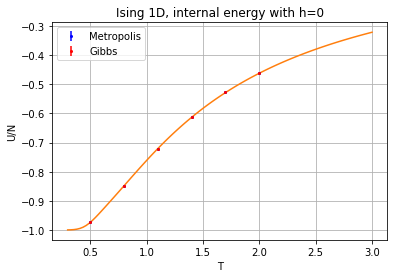

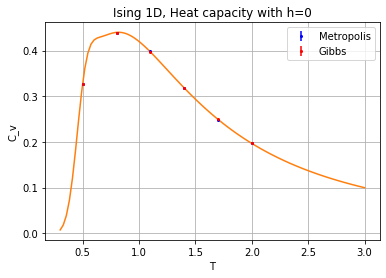

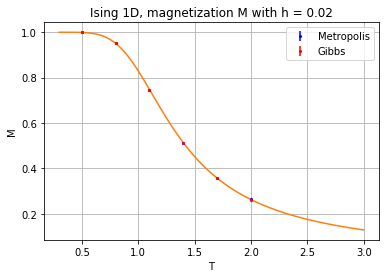

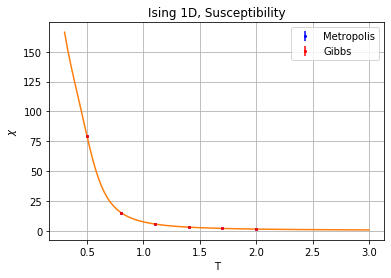

In [3]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

# ENERGIA INTERNA#

points=100
T = linspace(0.3,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th=zeros(points)
for i in range(points) :
    th[i] = tanh(J/T[i])
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

graph = genfromtxt('TvsE.metro')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='b', label='Metropolis', linestyle='None', marker='o', markersize=2)
graph = genfromtxt('TvsE.gibbs')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='r', label='Gibbs', linestyle='None', marker='o', markersize=2)
plt.plot(T, e, color='C1')
plt.title('Ising 1D, internal energy with h=0')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)
plt.show()


#CAPACITÀ TERMICA#

points=100
T = linspace(0.3,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th=zeros(points)
for i in range(points) :
    th[i] = tanh(J/T[i])
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

graph = genfromtxt('TvsC.metro')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='b',label='Metropolis', linestyle='None', marker='o', markersize=2)
graph = genfromtxt('TvsC.gibbs')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='r',label='Gibbs', linestyle='None', marker='o', markersize=2)
plt.plot(T, heat,color='C1')
plt.title('Ising 1D, Heat capacity with h=0')
plt.xlabel('T')
plt.ylabel('C_v')
plt.legend()
plt.grid(True)
plt.show()


# #MAGNETIZZAZIONE#

points=100
T = linspace(0.3,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th=zeros(points)
for i in range(points) :
    th[i] = tanh(J/T[i])
thN= th**Ns
ch = 1/th
h=0.2 #external field
M=zeros(points)
for p in range(points):
    b = 1/T[p]
    l1 = exp(b*J)*cosh(b*h)+sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))
    l2 = exp(b*J)*cosh(b*h)-sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M[p] = (exp(b*J)*sinh(b*h)*((l1**(Ns-1))*(1+exp(b*J)*cosh(b*h)/sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-exp(b*J)*cosh(b*h)/sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J)))))/(Z)
    
graph = genfromtxt('TvsM.metro')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='b',label='Metropolis', linestyle='None', marker='o', markersize=2)
graph = genfromtxt('TvsM.gibbs')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='r',label='Gibbs', linestyle='None', marker='o', markersize=2)
plt.plot(T, M,color='C1')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.grid(True)
plt.legend()
plt.show()

#SUSCETTIVITÀ#

points=100
T = linspace(0.3,3.0,num=points)
J = 1.0
Ns = 50
th=zeros(points)
for i in range(points) :
    th[i] = tanh(J/T[i])
thN= th**Ns
ch = 1/th
X=zeros(points)
for p in range(points):
    beta=1/T[p]
    X[p] = beta*exp(2*beta*J)*(1-thN[p])/(1+thN[p])

graph = genfromtxt('TvsX.metro')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2], color='b',label='Metropolis', linestyle='None', marker='o', markersize=2)
graph = genfromtxt('TvsX.gibbs')
plt.errorbar(graph[:,0],graph[:,1], yerr=graph[:,2],color='r', label='Gibbs', linestyle='None', marker='o', markersize=2)
plt.plot(T, X, color='C1')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)
plt.show()

I risultati ottenuti risultano posizionarsi sulla curva dei valori teorici e mostrano come i due campionamenti diversi siano del tutto equivalenti tra loro.